In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [2]:
%cd darknet
!pwd

/home/irteam/darknet
/home/irteam/darknet


In [10]:
import cv2
print(cv2.__version__)

4.5.0


In [6]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [19]:
# make darknet (build)
!make

chmod +x *.sh
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/detector.c -o obj/detector.o
./src/detector.c: In function ‘train_detector’:
./src/detector.c:437:72: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
          (iteration >= (iter_save + 1000) || iteration % 1000 == 0) && net.max_batches < 10000)
          ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~
./src/detector.c: In function ‘print_cocos’:
./src/detector.c:551:29: warning: format not a string literal and no format arguments [-Wformat-security]
                 fprintf(fp, buff);
                             ^~~~
./src/detector.c: In function ‘eliminate_bdd’:
./src/detector.c:663:21: warning: 

In [ ]:
!pkg-config --modversion opencv

In [ ]:
#darknet에 convolution layer 다운
#!wget https://pjreddie.com/media/files/darknet53.conv.74

In [3]:
# 이후 사용될 여러 기능 구현
def imShow(path): # 결과 사진 출력 함수
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload(): # 사용자 설정 파일 업로드 함수
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

def download(path): # 파일 다운로드 함수
  from google.colab import files
  files.download(path)

In [11]:
!ls -al ./train.sh 

-rwxr-xr-x 1 irteam irteam 94 May 24 09:06 ./train.sh


In [3]:
##학습된 가중치로 학습할 때 
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights -dont_show -map

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
 Prepare additional network for mAP calculation...
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 

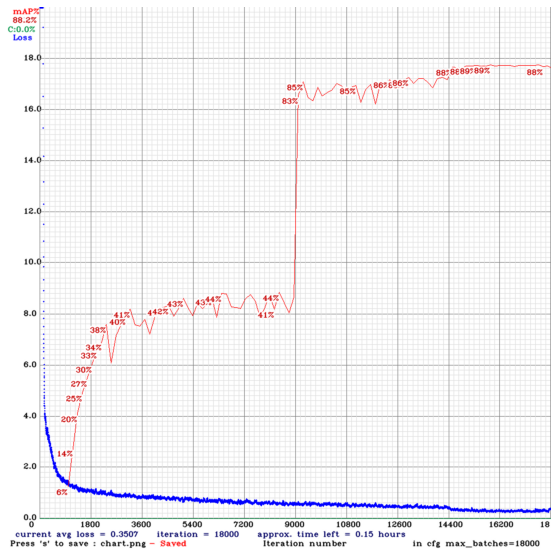

In [6]:
imShow('chart.png')

In [4]:
# ./darknet detector map {data파일} {cfg파일} {측정하려는weights파일}
!./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights -map

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/

In [7]:
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights data/test/shirt.jpeg -map
#사진 탐지
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights data/test/shirt.jpeg -ext_output -thresh 0.1 -dont_show
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights data/test_dataset/shirt.jpeg -ext_output -thresh 0.1 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [9]:
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights data/test/shirt.jpeg -map
#사진 탐지
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights data/test/stainOnShirt2.jpeg -ext_output -thresh 0.1 -dont_show
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights data/test_dataset/stainOnShirt2.jpeg -ext_output -thresh 0.1 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [13]:
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights data/test/stain3.jpeg -ext_output -thresh 0.06 -dont_show
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights data/test_dataset/stain3.jpeg -ext_output -thresh 0.06 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

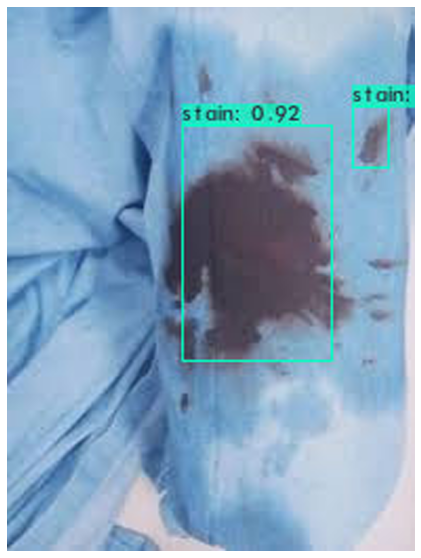

In [30]:
imShow('predictions.jpg')

In [29]:
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights data/test_dataset/img_71.jpeg -ext_output -thresh 0.06 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [57]:
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights data/test_dataset/stain17.jpeg -ext_output -thresh 0.06 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [ ]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 608 -height 608

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 608, height = 608 
 read labels from 3572 images 
 loaded 	 image: 3572 	 box: 7720	 box: 2020 image: 3442 	 box: 7344
 all loaded. 

 calculating k-means++ ...

 iterations = 67 


counters_per_class = 1083, 775, 906, 653, 1592, 338, 1286, 1087

 avg IoU = 64.64 % 

Saving anchors to the file: anchors.txt 
anchors =  17, 26,  55, 74, 160, 90,  88,171, 210,186, 142,302, 409,230, 258,382, 501,451


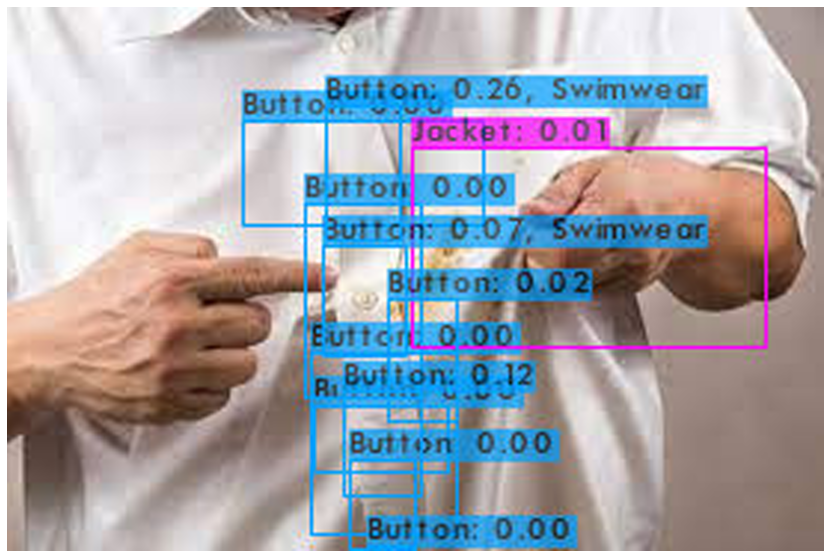

In [54]:
imShow('predictions.jpg')

In [53]:
!./darknet detector test data/obj.data cfg/yolov3-spp_custom.cfg backup/yolo-spp/yolov3-spp_custom_best.weights data/test_dataset/stain17.jpeg -ext_output -thresh 0.06 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [9]:
!./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights -map

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [7]:
!./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_last.weights -map

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 

In [5]:
!./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_final.weights -map

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
 0 : compute_capability = 860, cudnn_half = 1, GPU: GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/